# checking the pole prob dist from the ACL strat

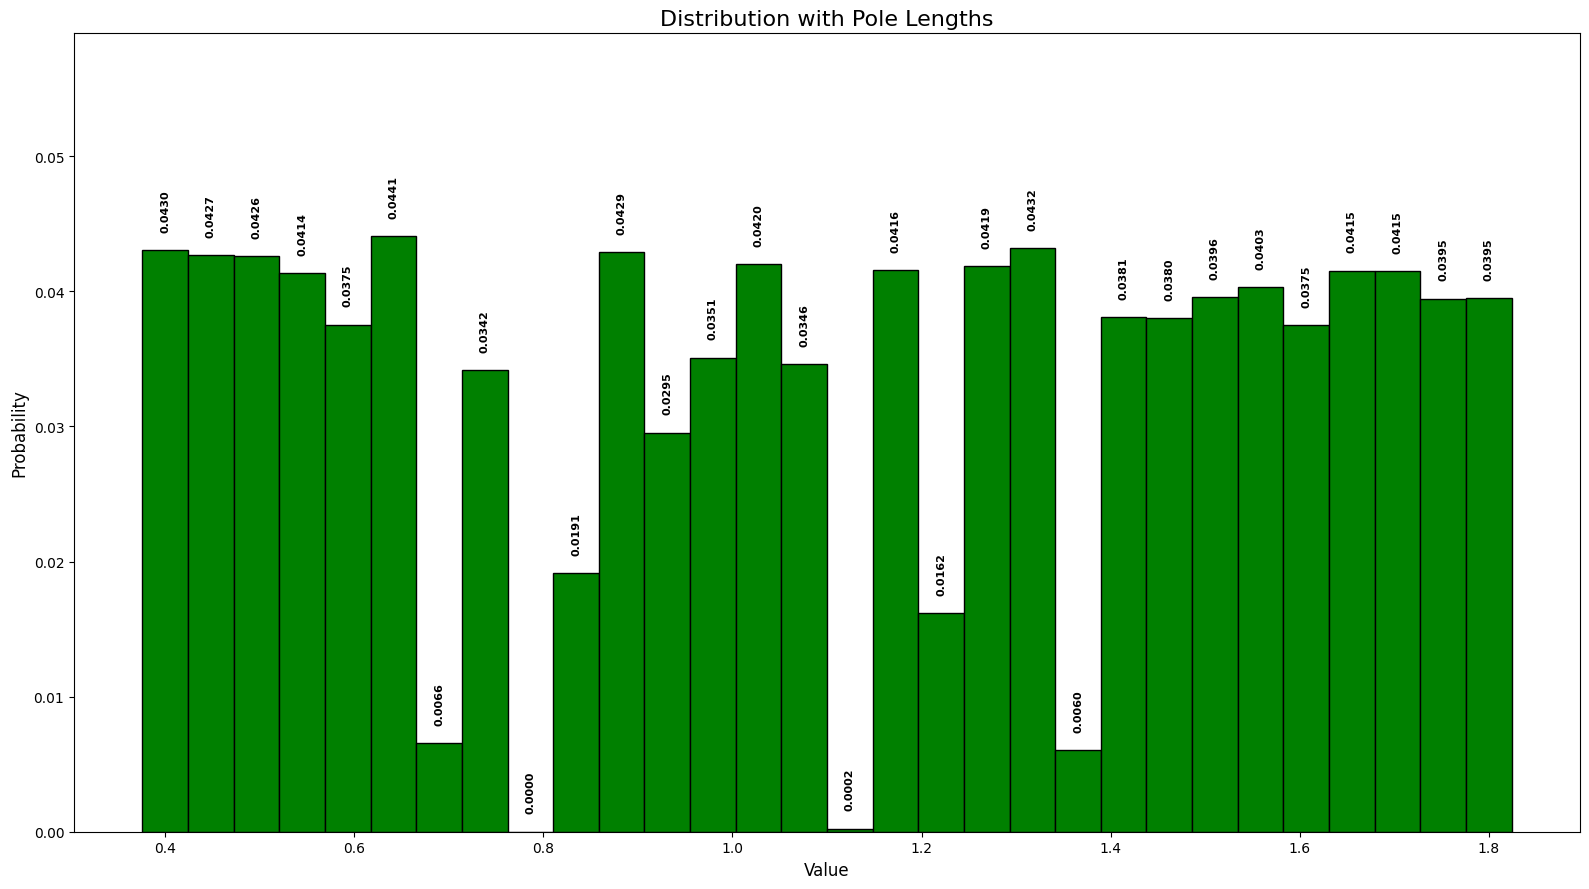

In [2]:
import json, matplotlib.pyplot as plt
with open('training_data_version_2/acl_strategy_data_tuple.json', 'r') as f: d = json.load(f)[-1]

x, y = list(map(float, d.keys())), list(d.values())
w = x[1] - x[0]
plt.figure(figsize=(16, 9)) # Bigger figure
plt.bar(x, y, w, color='g', edgecolor='k')
for i, v in zip(x, y):
    plt.text(i, v + 0.0015, f'{v:.4f}', ha='center', fontsize=8, rotation=90, weight='bold')
plt.title('Distribution with Pole Lengths', fontsize=16); plt.xlabel('Value', fontsize=12); plt.ylabel('Probability', fontsize=12)
plt.xticks(fontsize=10); plt.yticks(fontsize=10)
plt.ylim(0, max(y) + 0.015); plt.tight_layout()
plt.savefig('distribution_plot_larger.png')

Doing the stat testing 

In [3]:
!pip install scipy

   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
   --- ------------------------------------ 3.1/38.7 MB 18.5 MB/s eta 0:00:02
   --------- ------------------------------ 9.2/38.7 MB 24.8 MB/s eta 0:00:02
   --------------- ------------------------ 15.2/38.7 MB 25.9 MB/s eta 0:00:01
   ---------------------- ----------------- 21.8/38.7 MB 27.0 MB/s eta 0:00:01
   ---------------------------- ----------- 27.3/38.7 MB 27.0 MB/s eta 0:00:01
   ---------------------------------- ----- 33.0/38.7 MB 27.2 MB/s eta 0:00:01
   ---------------------------------------  38.5/38.7 MB 28.2 MB/s eta 0:00:01
   ---------------------------------------  38.5/38.7 MB 28.2 MB/s eta 0:00:01
   ---------------------------------------  38.5/38.7 MB 28.2 MB/s eta 0:00:01
   ---------------------------------------- 38.7/38.7 MB 20.5 MB/s  0:00:01


In [7]:
import pandas as pd
from scipy.stats import mannwhitneyu



# --- 1 & 2 (Same as before: Define paths and get_avg_data function) ---


# --- 1. Define File Paths and Names ---
BASE_PATH = r'results_version_2\excels_version_2\experiment_results_baseline.xlsx' 
ALGO_NAME = 'EDC' # <<< CHANGE THIS FOR PER, EDC, etc.
ALGO_PATH = f'results_version_2\\excels_version_2\\experiment_results_{ALGO_NAME.lower()}.xlsx' 

# --- 3. Load Data and Perform Mann-Whitney U Test ---
A_base, A_algo = get_avg_data(BASE_PATH), get_avg_data(ALGO_PATH)

# --- 2. Helper Function to Read Data ---
def get_avg_data(path):
    # Reads the file, filters 'Avg_' columns, and returns the single row of values
    # Assumes no index column and uses openpyxl engine for robustness
    D = pd.read_excel(path, engine='openpyxl', header=0, index_col=False)
    return D.filter(like='Avg_').iloc[0].values

# Mann-Whitney U test (non-parametric comparison of medians/distributions)
U_stat, P_val_MW = mannwhitneyu(A_base, A_algo, alternative='two-sided')

print(f"Comparison: Baseline vs {ALGO_NAME}")
print(f"Mann-Whitney U statistic: {U_stat:.2f}")
print(f"P-value (Mann-Whitney): {P_val_MW:.4f}")

Comparison: Baseline vs EDC
Mann-Whitney U statistic: 0.00
P-value (Mann-Whitney): 0.0000


# Here we do the mann whitney U and the F test for each method in comparison to baseline


In [13]:
import pandas as pd
from scipy.stats import mannwhitneyu, f

# --- CONFIGURATION (CHANGE ALGO_NAME HERE) ---
BASE_PATH = r'results_version_2\excels_version_2\experiment_results_baseline.xlsx' 
ALGO_NAME = 'PER' # <<< CHANGE THIS FOR PER, EDC, etc.
ALGO_PATH = f'results_version_2\\excels_version_2\\experiment_results_{ALGO_NAME.lower()}.xlsx' 

# --- HELPER FUNCTION ---
def get_avg_data(path):
    D = pd.read_excel(path, engine='openpyxl', header=0, index_col=False)
    return D.filter(like='Avg_').iloc[0].values

# --- LOAD DATA ---
A_base, A_algo = get_avg_data(BASE_PATH), get_avg_data(ALGO_PATH)
V_base, V_algo = A_base.var(ddof=1), A_algo.var(ddof=1)
K = len(A_base) - 1

# --- TEST A: MEAN FINAL PERFORMANCE (Mann-Whitney U Test) ---
# H_1,mu: Algorithm is significantly better than Baseline.
U_stat, P_val_mean = mannwhitneyu(A_base, A_algo, alternative='less') 

# --- TEST B: VARIANCE / CURRICULUM STABILITY (F-Test) ---
# H_1,sigma^2: Algorithm is significantly more stable (lower variance) than Baseline.
F_stat = max(V_base, V_algo) / min(V_base, V_algo)
P_val_var = 2 * f.sf(F_stat, K, K)

# --- RESULTS ---
print(f"--- Comparison: Baseline vs {ALGO_NAME} ---")

# Test A Results (Mean Performance)
print(f"\n[Test A: Mean Performance (H_1,mu)]")
print(f"Median Baseline: {np.median(A_base):.2f}, Median {ALGO_NAME}: {np.median(A_algo):.2f}")
print(f"Mann-Whitney U P-value: {P_val_mean:.4f}")

# Test B Results (Curriculum Stability/Variance)
print(f"\n[Test B: Stability (H_1,sigma^2)]")
print(f"Variance Baseline: {V_base:.4f}")
print(f"Variance {ALGO_NAME}: {V_algo:.4f}")
print(f"F-test P-value: {P_val_var:.4f}")

--- Comparison: Baseline vs PER ---

[Test A: Mean Performance (H_1,mu)]
Median Baseline: 123.65, Median PER: 156.10
Mann-Whitney U P-value: 0.0000

[Test B: Stability (H_1,sigma^2)]
Variance Baseline: 61.8314
Variance PER: 385.1483
F-test P-value: 0.0000
